.. _nb_discrete:

## Discrete Variable Problem

Mostly, *pymoo* was made for continuous problem, but of course other variable types can be used as well. The genetic algorithm is a very modular class and by modifying the sampling, crossover and mutation (in some cases also repair), different kind of variable types can be used (also more complicated ones such as tree, graph, ...)

In the following we consider an easy optimization problem where only integer variables are supposed to be used.

In [1]:
import numpy as np

from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling
from pymoo.optimize import minimize
from pymoo.model.problem import Problem


class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_constr=1, xl=0, xu=10, type_var=np.int)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = - np.min(x * [3, 1], axis=1)
        out["G"] = x[:, 0] + x[:, 1] - 10


method = get_algorithm("ga",
                       pop_size=20,
                       sampling=get_sampling("int_random"),
                       crossover=get_crossover("int_sbx", prob=1.0, eta=3.0),
                       mutation=get_mutation("int_pm", eta=3.0),
                       eliminate_duplicates=True,
                       )


res = minimize(MyProblem(),
               method,
               termination=('n_gen', 40),
               seed=1,
               save_history=True
               )

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)




Best solution found: [3 7]
Function value: [-7]
Constraint violation: [0.]


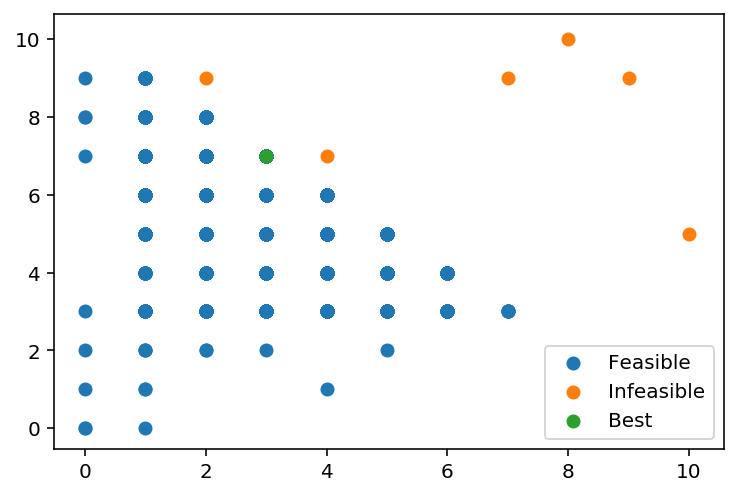

In [2]:
import matplotlib.pyplot as plt
from pymoo.util import plotting

_X = np.row_stack([a.pop.get("X") for a in res.history])
feasible = np.row_stack([a.pop.get("feasible") for a in res.history])[:, 0]

plotting.plot(_X[feasible], _X[np.logical_not(feasible)], res.X[None,:]
              , labels=["Feasible", "Infeasible", "Best"])